<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220523_Ch9_Surprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##08 파이썬 추천 시스템 패키지 - Surprise



**Surprise**

https://surprise.readthedocs.io/en/stable/

- 다양한 추천 알고리즘, 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용해 추천 시스템을 구축할 수 있다.
- Surprise의 핵심 API는 사이킷런의 핵심 API와 유사한 API명으로 작성되었다. 예를 들어 fit(), predict() API로 추천 데이터 학습과 예측, train_test_split()으로 추천 학습 데이터 세트와 예측 데이터 세트 분리, cross_validate(), GridSearchCV 클래스를 통해 추천 시스템을 위한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등의 기능을 제공한다.

In [1]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 7.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633712 sha256=6cf0e901cca442b23fe303bbf931c41e8a07f1d8264a2851da629a15282dd9a4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


###Surprise 를 이용한 추천 시스템 구축

In [3]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [6]:
data = Dataset.load_builtin('ml-100k', prompt=False)
trainset, testset = train_test_split(data, test_size = .25, random_state = 0)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [7]:
algo = SVD()
algo.fit(trainset)

추천 예측 메서드 test(), predict()

- test(): 사용자-아이템 평점 데이터 세트 전체에 대해 추천 예측
- predict(): 개별 사용자와 영화에 대한 추천 평점 반환

In [8]:
predictions = algo.test(testset)
print('prediction type:', type(predictions), ' size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type: <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.4056118406112272, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.9247012846983687, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=3.7360796257689333, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.6963606633724475, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.3309870460711575, details={'was_impossible': False})]

* was_impossible이 True -> 예측 불가능 데이터 / False -> 예측 가능 데이터

In [11]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.4056118406112272),
 ('882', '291', 3.9247012846983687),
 ('535', '507', 3.7360796257689333)]

In [12]:
#사용자 아이디, 아이템 아이디는 문자열로 입력
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.37   {'was_impossible': False}


In [13]:
accuracy.rmse(predictions)

RMSE: 0.9475


0.9474524598370104

###Surprise 주요 모듈 소개

- Dataset: 데이터 세트의 칼럼 순서는 반드시 사용자 아이디, 아이템 아이디, 평점 순

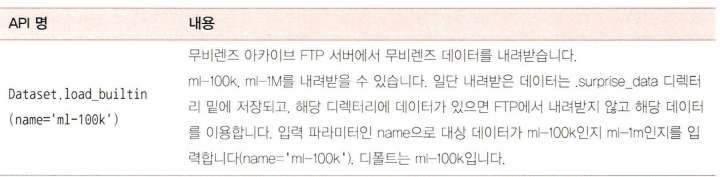

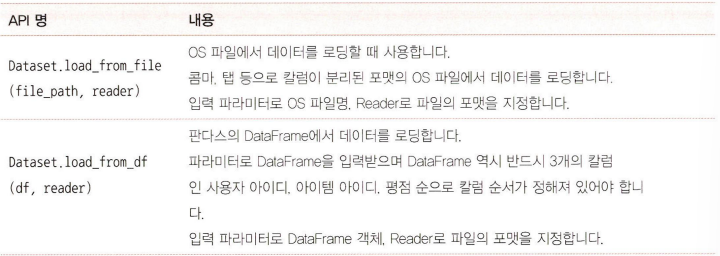

**OS 파일 데이터를 Surprise 데이터 세트로 로딩**

로딩되는 데이터 파일에 칼럼명을 가지는 헤더 문자열이 있으면 안됨

In [14]:
import pandas as pd

In [16]:
ratings = pd.read_csv('/content/ratings.csv')
#ratings_noh.csv 파일로 언로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/content/ratings_noh.csv', index=False, header=False)

In [17]:
from surprise import Reader

In [22]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('/content/ratings_noh.csv',reader=reader)

**Reader 주요 파라미터**

- line_format(string): 칼럼을 순서대로 나열. 입력된 문자열을 공백으로 분리해 칼럼으로 인식
- sep(char): 칼럼을 분리하는 분리자. 디폴트는 '\t'. DataFrame에서 입력받을 경우에는 기재할 필요X
- rating_scale(tuple, optional): 평점 값의 최소~최대 평점 설정. 디폴트 (1, 5)

In [23]:
trainset, testset = train_test_split(data, test_size = .25, random_state=0)

algo = SVD(n_factors = 50, random_state=0)

algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

###판다스 DataFrame에서 Surprise 데이터 세트로 로딩

In [26]:
ratings = pd.read_csv('/content/ratings.csv')
reader = Reader(rating_scale = (0.5, 5.0))

#ratings DataFrame에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size = .25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predidctions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

###Surprise 추천 알고리즘 클래스

- SVD: 행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD 알고리즘
- KNNBasic: 최근접 이웃 협업 필터링을 위한 KNN 알고리즘
- BaselineOnly: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘

http://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

**SVD 파라미터**
- n_factors: 잠재 요인 K의 개수, 디폴트 100. 커질수록 정확도가 높아지나 과적합 가능성 O
- n_epochs: SGD(Stochasitc Gradient Descent) 수행 시 반복 횟수. 디폴트 20
- biased(bool): 베이스라인 사용자 편향 적용 여부. 디폴트 True

### 베이스라인 평점

Baseline: 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식

베이스라인 평점 = 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수

- 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점의 평균
- 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
- 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

###교차 검증과 하이퍼 파라미터 튜닝

In [28]:
from surprise.model_selection import cross_validate

ratings = pd.read_csv('/content/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8644  0.8730  0.8773  0.8784  0.8739  0.8734  0.0049  
MAE (testset)     0.6660  0.6696  0.6740  0.6746  0.6714  0.6711  0.0031  
Fit time          8.07    7.15    6.62    5.71    6.21    6.75    0.81    
Test time         0.14    0.47    0.20    0.34    0.15    0.26    0.12    


{'fit_time': (8.073644876480103,
  7.1492509841918945,
  6.615609169006348,
  5.706466436386108,
  6.214640378952026),
 'test_mae': array([0.66596895, 0.66961486, 0.67398739, 0.67457559, 0.67135431]),
 'test_rmse': array([0.86435326, 0.87298738, 0.87730086, 0.87839242, 0.87394509]),
 'test_time': (0.14151978492736816,
  0.46686220169067383,
  0.20489811897277832,
  0.33650660514831543,
  0.1510770320892334)}

In [29]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}

gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv=3)
gs.fit(data)

#최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8774519912849978
{'n_epochs': 20, 'n_factors': 50}


###Surprise를 이용한 개인화 영화 추천 시스템 구축

In [34]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data_folds = DatasetAutoFolds(ratings_file = '/content/ratings_noh.csv', reader = reader)

trainset = data_folds.build_full_trainset()

In [36]:
algo = SVD(n_epochs = 20, n_factors = 50, random_state = 0)
algo.fit(trainset)

In [37]:
#영화에 대한 상세 속성 정보 df 로딩
movies = pd.read_csv('/content/movies.csv')
#userId=9의 movieId 데이터 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']

if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [38]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [40]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

    #모든 영화의 movieId를 리스트로 생성
    total_movies = movies['movieId'].tolist()

    #모든 영화의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화 수:', len(seen_movies), '추천 대상 영화 수:', len(unseen_movies), '전체 영화 수:', len(total_movies))
    
    return unseen_movies

In [41]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


In [46]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    #알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행 수 결과를 list로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

    #predictions list 객체는 surprise의 Predictions 객체를 원소로 가짐
    #이를 est 값으로 정렬하기 위해 아래의 sortkey_est 함수 정의
    #sortkey_est 함수는 list 객체의 sort() 함수의 키 값을 사용되어 정렬 수행
    def sortkey_est(pred):
        return pred.est

    #sortkey_esr() 반환값의 내림차순으로 정렬 수행 후 top_n개의 최상위 값 추출
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions=predictions[:top_n]

    #top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_rating = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

    top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

    return top_movie_preds

In [49]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('#### Top-10 추천 영화 리스트 ####')
for top_movie in top_movie_preds:
    print(top_movie[1], ':', round(top_movie[2], 3))

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
#### Top-10 추천 영화 리스트 ####
Usual Suspects, The (1995) : 4.306
Star Wars: Episode IV - A New Hope (1977) : 4.282
Pulp Fiction (1994) : 4.278
Silence of the Lambs, The (1991) : 4.226
Godfather, The (1972) : 4.192
Streetcar Named Desire, A (1951) : 4.155
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108
Goodfellas (1990) : 4.083
Glory (1989) : 4.079
